In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy
import traceback
import datetime as dt
import pickle

In [4]:
## Wooden Pieces
# Bright wooden piece
# The pull ring is on the left side
bright_piece = [
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

# Dark wooden piece
# The pull ring is on the left side
dark_piece = [
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

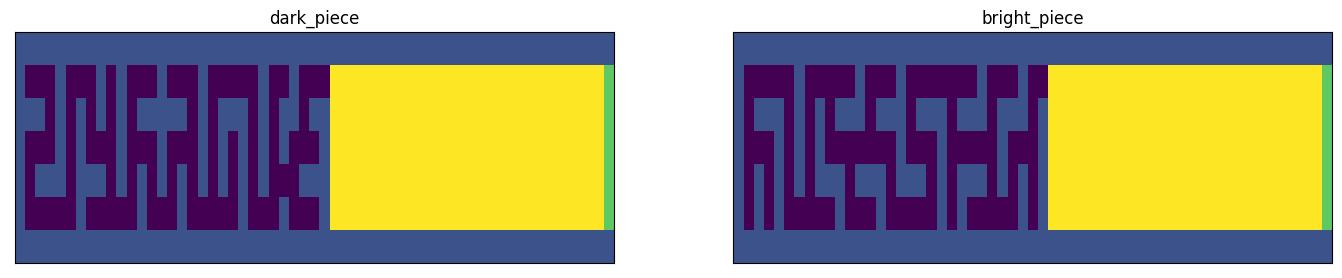

In [5]:
plt.figure(figsize=(17,3))
plt.subplot(121)
plt.title('dark_piece')
plt.pcolormesh(dark_piece)
plt.gca().invert_yaxis()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(122)
plt.title('bright_piece')
plt.pcolormesh(bright_piece)
plt.gca().invert_yaxis()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

In [ ]:
class slider:
    def __init__(self,id_number,
                 row_dark_piece,column_dark_piece,
                row_bright_piece,column_bright_piece):
        # ID
        self.id_number = id_number
        # dark piece position
        self.column_dark_piece = column_dark_piece
        self.row_dark_piece = row_dark_piece
        # dark piece surround
        self.left_dark_piece = self.column_dark_piece - 1
        self.right_dark_piece = self.column_dark_piece + 1
        self.up_dark_piece = row_dark_piece - 1
        self.down_dark_piece = row_dark_piece + 1
        # bright piece position
        self.column_bright_piece = column_bright_piece
        self.row_bright_piece = row_bright_piece
        # bright piece surround
        self.left_bright_piece = self.column_bright_piece - 1
        self.right_bright_piece = self.column_bright_piece + 1
        self.up_bright_piece = row_bright_piece - 1
        self.down_bright_piece = row_bright_piece + 1
        
    def set_new_slider_position_dark(self,new_row,new_column):
        self.column_dark_piece = new_column
        self.row_dark_piece = new_row
        self.left_dark_piece = new_column - 1
        self.right_dark_piece = new_column + 1
        self.up_dark_piece = new_row - 1 
        self.down_dark_piece = new_row + 1

    def set_new_slider_position_bright(self,new_row,new_column):
        self.column_bright_piece = new_column
        self.row_bright_piece = new_row
        self.left_bright_piece = new_column - 1
        self.right_bright_piece = new_column + 1
        self.up_bright_piece = new_row - 1 
        self.down_bright_piece = new_row + 1
        
    def set_new_slider_position_dark(self,new_row_dark_piece,new_column_dark_piece):
        self.column_dark_piece = new_column_dark_piece
        self.row_dark_piece = new_row_dark_piece
        self.left_dark_piece = new_column_dark_piece - 1
        self.right_dark_piece = new_column_dark_piece + 1
        self.up_dark_piece = new_row_dark_piece - 1 
        self.down_dark_piece = new_row_dark_piece + 1
            
        
# Set initial slider positions
# slider(ID,dark_row,dark_col,bright_row,bright_col)
# 5
slider1 = slider(1,5,1,5,27)
# 4
slider2 = slider(2,5,7,5,21)
# 3
slider3 = slider(3,5,13,5,15)
# 2
slider4 = slider(4,3,19,3,9)
# 1
slider5 = slider(5,5,25,5,3)

current_config = [slider1,slider2,slider3,slider4,slider5]
initial_config = copy.deepcopy(current_config)

In [ ]:
# Define moves of wooden pieces
# they are defined as changes in position of sliders
def left_move_dark(current_config):
    left_config = copy.deepcopy(current_config)
    new_config = []
    for slider in left_config:
        slider.set_new_slider_position_dark(slider.row_dark_piece,slider.left_dark_piece)
        new_config.append(slider)
    return new_config
def left_move_bright(current_config):
    left_config = copy.deepcopy(current_config)
    new_config = []
    for slider in left_config:
        slider.set_new_slider_position_bright(slider.row_bright_piece,slider.left_bright_piece)
        new_config.append(slider)
    return new_config

def right_move_dark(current_config):
    right_config = copy.deepcopy(current_config)
    new_config = []
    for slider in right_config:
        slider.set_new_slider_position_dark(slider.row_dark_piece,slider.right_dark_piece)
        new_config.append(slider)
    return new_config
def right_move_bright(current_config):
    right_config = copy.deepcopy(current_config)
    new_config = []
    for slider in right_config:
        slider.set_new_slider_position_bright(slider.row_bright_piece,slider.right_bright_piece)
        new_config.append(slider)
    return new_config
        
def move_random_slider_up(up_list,current_config):
        slider = random.choice(up_list)
        chosen_slider = copy.deepcopy(slider)
        chosen_slider.set_new_slider_position_dark(chosen_slider.up_dark_piece,chosen_slider.column_dark_piece)
        new_config = []
        for slider in current_config:
            if slider.id_number == chosen_slider.id_number:
                # Change also position on bright piece
                if chosen_slider.id_number == 1:
                    #5 
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.up_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1

                elif chosen_slider.id_number == 2:
                    #4
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.up_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 3:
                    #3
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.up_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 4:
                    #2
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.up_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 5:
                    #1
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.up_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                
                new_config.append(chosen_slider)
            else:
                new_config.append(slider)
        return new_config

def move_random_slider_down(down_list,current_config):
        slider = random.choice(down_list)
        chosen_slider = copy.deepcopy(slider)
        chosen_slider.set_new_slider_position_dark(chosen_slider.down_dark_piece,chosen_slider.column_dark_piece)            
        new_config = []
        for slider in current_config:
            if slider.id_number == chosen_slider.id_number:
                # Change also position on bright piece
                if chosen_slider.id_number == 1:
                    #5 
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.down_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1

                elif chosen_slider.id_number == 2:
                    #4
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.down_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 3:
                    #3
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.down_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 4:
                    #2
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.down_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                elif chosen_slider.id_number == 5:
                    #1
                    chosen_slider.column_bright_piece = chosen_slider.column_bright_piece
                    chosen_slider.row_bright_piece = chosen_slider.down_bright_piece
                    chosen_slider.left_bright_piece = chosen_slider.column_bright_piece - 1
                    chosen_slider.right_bright_piece = chosen_slider.column_bright_piece + 1
                    chosen_slider.up_bright_piece = chosen_slider.row_bright_piece - 1 
                    chosen_slider.down_bright_piece = chosen_slider.row_bright_piece + 1
                
                new_config.append(chosen_slider)
                
            else:
                new_config.append(slider)
        return new_config

In [ ]:
def print_solution(new_config, dark_piece, bright_piece, move_def, i):
    dark_piece_plot = copy.deepcopy(dark_piece)
    bright_piece_plot = copy.deepcopy(bright_piece)
    for slider in new_config:
        dark_piece_plot[slider.row_dark_piece][slider.column_dark_piece] = slider.id_number + 2
        bright_piece_plot[slider.row_bright_piece][slider.column_bright_piece] = slider.id_number + 2
    plt.figure(figsize=(17,2))

    plt.subplot(121)
    plt.title('dark_piece')
    plt.pcolormesh(dark_piece_plot)
    plt.gca().invert_yaxis()
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.annotate(move_def,xy=(45,0),fontsize=16)
    plt.subplot(122)
    plt.title('bright_piece')
    plt.pcolormesh(bright_piece_plot)
    plt.gca().invert_yaxis()
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #plt.show()

    plt.savefig('solution\solution'+str(i)+'.png', format='png')
    plt.clf()
    plt.close()

move_def='None'
print_solution(initial_config,dark_piece,bright_piece,move_def,3)

In [ ]:
dark_piece_select = copy.deepcopy(dark_piece)
bright_piece_select = copy.deepcopy(bright_piece)

def select_step(current_config, dark_piece_select, bright_piece_select):
    ## Check if wooden piece can move
    # Dark piece left side
    left_list_dark = []
    for slider in current_config:
        if dark_piece_select[slider.row_dark_piece][slider.left_dark_piece] == 1:
            left_list_dark.append(False)
        else:
            left_list_dark.append(True) 
    left_move_check_dark = all(left_list_dark)
    # Dark piece right side
    right_list_dark = []
    for slider in current_config:
        if dark_piece_select[slider.row_dark_piece][slider.right_dark_piece] == 1:
            right_list_dark.append(False)
        else:
            right_list_dark.append(True) 
    right_move_check_dark = all(right_list_dark)

    # Bright piece left side
    left_list_bright = []
    for slider in current_config:
        if bright_piece_select[slider.row_bright_piece][slider.left_bright_piece] == 1:
            left_list_bright.append(False)
        else:
            left_list_bright.append(True) 
    left_move_check_bright = all(left_list_bright)
    # Bright piece right side
    right_list_bright = []
    for slider in current_config:
        if bright_piece_select[slider.row_bright_piece][slider.right_bright_piece] == 1:
            right_list_bright.append(False)
        else:
            right_list_bright.append(True) 
    right_move_check_bright = all(right_list_bright)
    
    # Check all sliders if they can move
    # Select randomly one slider to move
    # Give list of sliders that can move 
    up_list = []
    for slider in current_config:
        # up check
        if dark_piece_select[slider.up_dark_piece][slider.column_dark_piece] in (0,4) and \
            bright_piece_select[slider.up_bright_piece][slider.column_bright_piece] in (0,4):
            up_list.append(slider)
    
    down_list = []  
    #print('down_slider')
    for slider in current_config:
        # down check
        #print(dark_piece[slider.down][slider.column])
        if dark_piece_select[slider.down_dark_piece][slider.column_dark_piece] in (0,4) and \
            bright_piece_select[slider.down_bright_piece][slider.column_bright_piece] in (0,4):
            down_list.append(slider)
               
    # When a wooden piece is already out, done move it anymore
    # check if dark piece is alredy out
    already_done_dark = []
    for slider in current_config:
        if dark_piece_select[slider.row_dark_piece][slider.column_dark_piece] == 4:
            already_done_dark.append(True)
        else:
            already_done_dark.append(False)
    if all(already_done_dark):
        left_move_check_dark = False
        right_move_check_dark = False
        #print('dont move dark piece anymore')
    # check if bright piece is alredy out
    already_done_bright = []
    for slider in current_config:
        if bright_piece_select[slider.row_bright_piece][slider.column_bright_piece] == 4:
            already_done_bright.append(True)
        else:
            already_done_bright.append(False)
    if all(already_done_bright):
        left_move_check_bright = False
        right_move_check_bright = False
        #print('dont move bright piece anymore')
    
    # Take choise which move to do
    move_check = False
    move_def = None
#########################################
    possible_choices = []
    if right_move_check_dark:
        possible_choices.append(1)
    if left_move_check_dark:
        possible_choices.append(2)
    if right_move_check_bright:
        possible_choices.append(3)
    if left_move_check_bright:
        possible_choices.append(4)
    if len(up_list)>=1:
        possible_choices.append(5)
    if len(down_list)>=1:
        possible_choices.append(6)
    
    choice = random.choice(possible_choices)
    if choice == 1:
        new_config = right_move_dark(current_config)
        move_check = True
        move_def = 'right_move_dark'
    elif choice == 2:
        new_config = left_move_dark(current_config)
        move_check = True
        move_def = 'left_move_dark'
    elif choice == 3:
        new_config = right_move_bright(current_config)
        move_check = True
        move_def = 'right_move_bright'
    elif choice == 4:
        new_config = left_move_bright(current_config)
        move_check = True
        move_def = 'left_move_bright'
    elif choice == 5:
        new_config = move_random_slider_up(up_list,current_config)
        #print('up')
    elif choice == 6:
        new_config = move_random_slider_down(down_list,current_config)
        #print('down')

#########################################
    else:
        print('didnt do anything')
    
    return new_config, move_check, move_def, up_list, down_list, possible_choices

new_config, move_check, move_def, up_list, down_list, possible_choices = select_step(current_config,dark_piece_select,bright_piece_select)
current_config = copy.deepcopy(new_config)

In [ ]:
def check_solution(new_config,dark_piece_select,bright_piece_select):
    solution_list = []
    for slider in new_config:     
        if dark_piece_select[slider.row_dark_piece][slider.column_dark_piece] == 4:
            solution_list.append(True)
        else:
            solution_list.append(False)
        if bright_piece_select[slider.row_bright_piece][slider.column_bright_piece] == 4:
            solution_list.append(True)
        else:
            solution_list.append(False)            

    solution_check = all(solution_list)
    return solution_check

In [ ]:
def solver_loop(initial_config):
    print('begin solving puzzle')
    solving_process = []
    initial_step = []
    dark_piece_select = copy.deepcopy(dark_piece)
    bright_piece_select = copy.deepcopy(bright_piece)
    current_config = copy.deepcopy(initial_config)
    moves_list = []
    t = dt.datetime.now()
    j = 1
    while(True):
        delta = dt.datetime.now() - t
        # Select new step
        dark_piece_select = copy.deepcopy(dark_piece)
        bright_piece_select = copy.deepcopy(bright_piece)
        
        new_config, move_check, move_def, up_list, down_list, possible_choices = select_step(current_config,dark_piece_select,bright_piece_select)
    
        # Store all moves in a list
        if move_check:
            moves_list.append([new_config,move_def])
            if len(moves_list) >= 1000:
                #save list
                with open("move_list_"+str(j)+".txt", "wb") as fp:
                    pickle.dump(moves_list, fp)
                moves_list.clear()
                j = j+1
        
        # Check if solution found
        if check_solution(new_config,dark_piece_select,bright_piece_select):
            print('Solution found')
            #print_solution(new_config,dark_piece_select,bright_piece_select,7)
            i = 0
            for move_config, move_def in moves_list:
                print_solution(move_config,dark_piece_select,bright_piece_select,move_def,i)
                i += 1
            break
        
        if delta.seconds >= 120:
            move_def = None
            i=1
            print_solution(move_config,dark_piece_select,bright_piece_select,move_def,i)
            t = dt.datetime.now()
        
        current_config = copy.deepcopy(new_config)
        
    return new_config, move_check, up_list, down_list, possible_choices
try:
    new_config, move_check, up_list, down_list, possible_choices = solver_loop(initial_config)
except Exception:
    dark_piece_select = copy.deepcopy(dark_piece)
    bright_piece_select = copy.deepcopy(bright_piece)
    print_solution(new_config,dark_piece_select,bright_piece_select,None,7)
    traceback.print_exc()
    